# Amazon Sales Report Analysis

05 FEB 2025

#### Contact Information

Name - Sandeep Prajapat

Contact - +91-8502983497

Email - sandeep7773@yahoo.com

linkdin -http://www.linkedin.com/in/sandeep-kumar-prajapat

** This Project is a part of Data Analyst Internship at Innobyte Services. **

## Project Overview

By conducting a thorough analysis of the Amazon sales report, the goal is to gain valuable insights that can be leveraged to optimize business operations, enhance customer experience, and drive revenue growth.

## Business Task Summary

1. Sales Overview: Understand the overall sales performance, trends, and patterns over time.
2. Product Analysis: Analyze the distribution of product categories, sizes, and quantities sold to identify popular products.
3. Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders.
4. Customer Segmentation: Segment customers based on their buying behavior, location, and other relevant factors.
5. Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities.
6. Business Insights: Provide actionable insights and recommendations based on the analysis to optimize sales strategies, improve customer satisfaction, and enhance overall business performance.

## Process

1. Data Understanding
2. Data Cleaning
3. Data Analysis
4. Undercover Insights


### Setting up My Environment  by Loading the Needful Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Understanding

This dataset is provided by Innobyte Services as part of Data Analyst Internship Program.The provided dataset contains information about sales transactions on Amazon, including details such as order ID, date, status, fulfillment method, sales channel, product category, size, quantity, amount, shipping details, and more.

Datasets: https://drive.google.com/file/d/1YrjYKtS1WHmINL6eafRsrDzrZaw2_WvX/view?usp=sharing 

In [15]:
amazon_sales = pd.read_csv(r"C:\Users\sande\Downloads\Amazon_sales_report.csv",low_memory=False)

In [16]:
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128017 non-null  object 
 1   Date                128017 non-null  object 
 2   Status              128017 non-null  object 
 3   Fulfilment          128017 non-null  object 
 4   Sales Channel       128017 non-null  object 
 5   ship-service-level  128017 non-null  object 
 6   Category            128017 non-null  object 
 7   Size                128017 non-null  object 
 8   Courier Status      128017 non-null  object 
 9   Qty                 128017 non-null  float64
 10  Amount              128185 non-null  float64
 11  ship-state          127985 non-null  object 
 12  ship-city           128017 non-null  object 
 13  B2B                 128017 non-null  object 
 14  fulfilled-by        38932 non-null   object 
dtypes: float64(2), object(13)
memory u

In [17]:
amazon_sales.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-state,ship-city,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,647.62,MAHARASHTRA,MUMBAI,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,406.00,KARNATAKA,BENGALURU,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1.0,329.00,MAHARASHTRA,NAVI MUMBAI,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,753.33,PUDUCHERRY,PUDUCHERRY,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1.0,574.00,TAMIL NADU,CHENNAI,False,NaN


In [18]:
amazon_sales['Date'] = pd.to_datetime(amazon_sales['Date'])

In [19]:
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128017 non-null  object        
 1   Date                128017 non-null  datetime64[ns]
 2   Status              128017 non-null  object        
 3   Fulfilment          128017 non-null  object        
 4   Sales Channel       128017 non-null  object        
 5   ship-service-level  128017 non-null  object        
 6   Category            128017 non-null  object        
 7   Size                128017 non-null  object        
 8   Courier Status      128017 non-null  object        
 9   Qty                 128017 non-null  float64       
 10  Amount              128185 non-null  float64       
 11  ship-state          127985 non-null  object        
 12  ship-city           128017 non-null  object        
 13  B2B                 128017 no

In [20]:
amazon_sales = amazon_sales.dropna(subset = ['Amount', 'Qty'])

## Data Cleaning Summary:

To ensure data accuracy and consistency, the following cleaning steps were performed using Excel:

1. Removed Duplicates: Eliminated duplicate entries to maintain data integrity.
2. Standardized Date Format: Converted all dates to a uniform format for consistency in time-based analysis.
3. Handled Missing Values: Addressed blank values by appropriate imputation or removal based on context.
4. Standardized Data Entries: Unified inconsistent entries (e.g., 'rj' → 'RAJASTHAN', 'delhi' → 'DELHI') for consistency in analysis.
5. Removed Unnecessary Columns: Dropped columns that were not relevant to the analysis to optimize data processing.
6. Date column converted to datetime format by using python.

## Sales Trends Over Time

In [24]:
sales_trend = amazon_sales.groupby('Date')['Amount'].sum()

print(sales_trend)

Date
2022-03-31     101683.85
2022-04-01     863016.60
2022-04-02     911001.53
2022-04-03    1005454.38
2022-04-04     877763.74
                 ...    
2022-06-25     652651.58
2022-06-26     773004.02
2022-06-27     713388.67
2022-06-28     767433.53
2022-06-29     409801.76
Name: Amount, Length: 91, dtype: float64


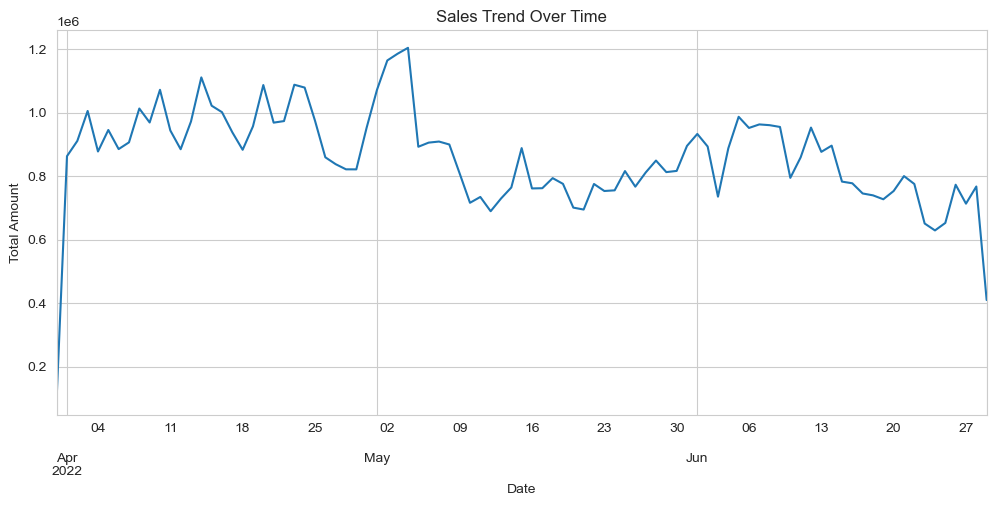

In [25]:
sns.set_style('whitegrid')

plt.figure(figsize = (12,5))
sales_trend.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

#### Insight:




1. There are fluctuations in daily sales, with peak days having sales over ₹1 million, but some days dropping below ₹500K.
2. A significant drop in sales towards the end of the analyzed period (June 29).

#### Actions:

1. Identify seasonal trends: Compare sales data across different months/years to find patterns.
2. Optimize marketing campaigns: Run ads/promotions before expected dips to stabilize revenue.
3. Stock Management: Ensure inventory levels align with sales peaks to avoid stockouts.



## Best & Worst Performing Product Categories

In [31]:
category_sales = amazon_sales.groupby('Category')['Amount'].sum().sort_values(ascending = False)

print(category_sales)

Category
T-shirt     39074570.36
Shirt       21127971.29
Blazzer     11141538.83
Trousers     5328406.30
Perfume       787818.66
Wallet        452367.18
Socks         147552.50
Shoes         118968.76
Watch            610.00
Name: Amount, dtype: float64


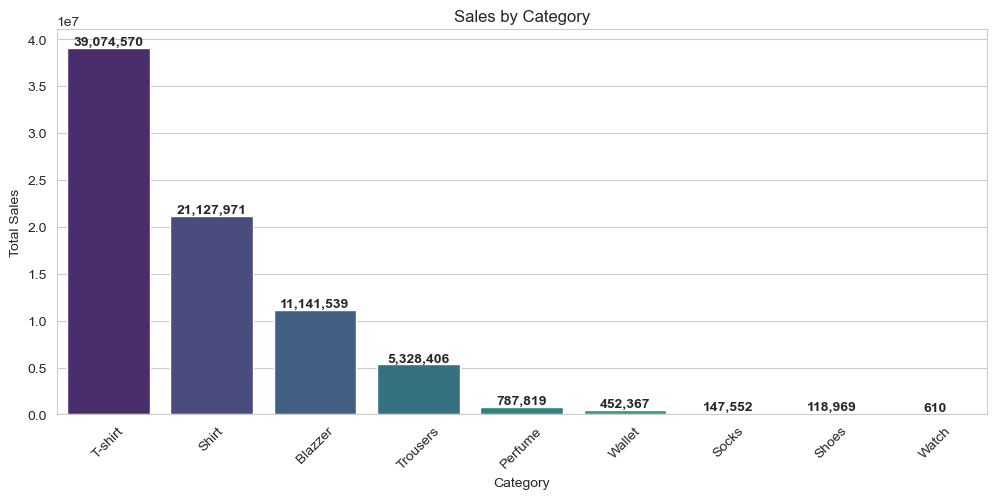

In [32]:
plt.figure(figsize =(12,5))
ax = sns.barplot(x = category_sales.index, y = category_sales.values, hue=category_sales.index, palette='viridis', legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
               (p.get_x() + p.get_width()/2, p.get_height()),
            ha = 'center', va = 'bottom', fontsize = 10, fontweight = 'bold')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.show()
plt.close('all')

#### Insight:


1. T-shirts (₹39M) and Shirts (₹21M) are top-selling categories, indicating strong demand.
2. Perfumes, Wallets, Socks, and Watches have low sales compared to apparel.



#### Actions:


1. Upsell & Cross-sell: Bundle low-selling items (e.g., watches, socks) with high-demand categories.
2. Expand product range: Introduce variations of high-selling categories (e.g., new T-shirt designs).
3. Discount on low-performing items: Offer promotions or flash sales on slow-moving products.


## Size Preference in Apparel Sales

In [38]:
size_qty = amazon_sales.groupby('Size')['Qty'].sum().sort_values(ascending = False)

print(size_qty)

Size
M       20031.0
L       19581.0
XL      18509.0
XXL     16154.0
S       14982.0
3XL     13277.0
XS       9789.0
Free     2046.0
6XL       680.0
5XL       512.0
4XL       392.0
Name: Qty, dtype: float64


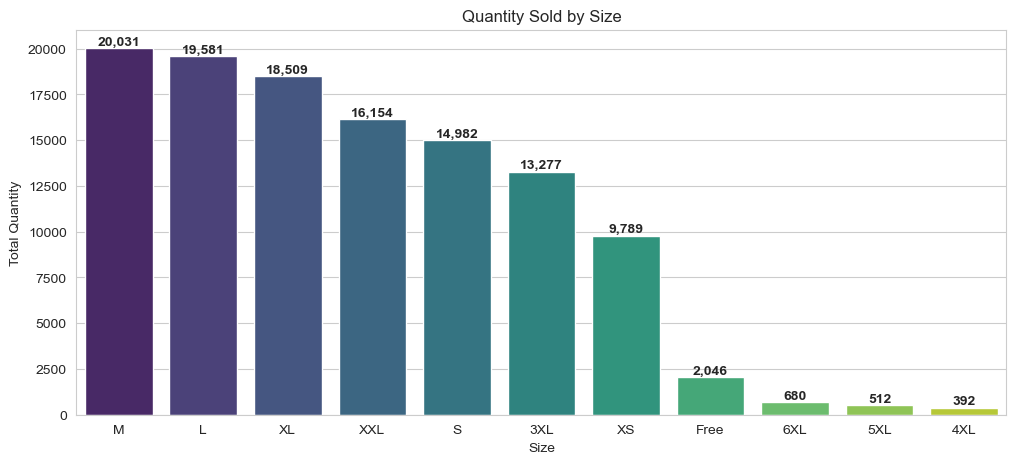

In [39]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=size_qty.index, y=size_qty.values, hue=size_qty.index, palette='viridis', legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Quantity Sold by Size')
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.show()

#### Insight:


1. M (20K), L (19K), and XL (18K) sizes are the most popular.
2. 5XL, 6XL, and 4XL have the least demand.


#### Actions:


1. Stock more of M, L, XL sizes to align with demand.
2. Offer custom fits: Introduce tailored options for less popular sizes instead of overstocking.

## State & City-Wise Sales Performance

In [45]:
state_sales = amazon_sales.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
print(state_sales)

ship-state
MAHARASHTRA          13261933.90
KARNATAKA            10421496.02
TELANGANA             6880035.27
UTTAR PRADESH         6798644.08
TAMIL NADU            6477109.53
DELHI                 4374246.41
KERALA                3798362.96
WEST BENGAL           3487951.01
ANDHRA PRADESH        3198443.86
HARYANA               2874244.99
GUJARAT               2710744.72
RAJASTHAN             1754343.16
MADHYA PRADESH        1582583.12
BIHAR                 1409186.32
ODISHA                1382387.39
PUNJAB                1206768.84
ASSAM                 1015181.20
UTTARAKHAND            967812.55
JHARKHAND              915905.21
GOA                    634935.85
CHHATTISGARH           565913.83
HIMACHAL PRADESH       500929.51
JAMMU & KASHMIR        456161.74
CHANDIGARH             210969.67
MANIPUR                210003.99
PUDUCHERRY             188918.24
ANDAMAN & NICOBAR      157424.62
NAGALAND               145055.67
SIKKIM                 140093.66
MEGHALAYA              118442.81

In [46]:
state_sales = state_sales.reset_index()
state_sales.columns = ['ship-state', 'Amount']

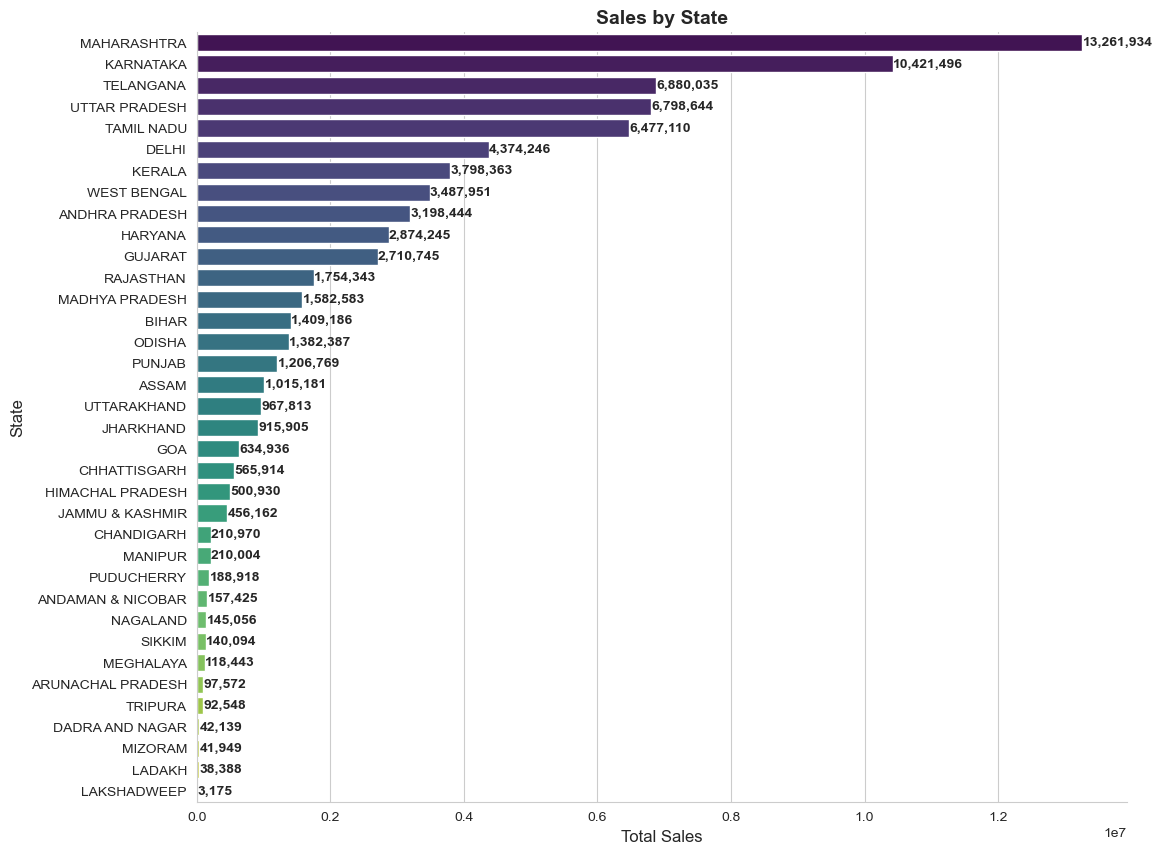

In [47]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='ship-state', x='Amount', data=state_sales, hue='ship-state', palette='viridis', legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width() + 5000, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold')

plt.title('Sales by State', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)

sns.despine()
plt.show()

## Top 05 Performing State

In [49]:
top_5_states = state_sales.head(5).reset_index()

print(top_5_states)

   index     ship-state       Amount
0      0    MAHARASHTRA  13261933.90
1      1      KARNATAKA  10421496.02
2      2      TELANGANA   6880035.27
3      3  UTTAR PRADESH   6798644.08
4      4     TAMIL NADU   6477109.53


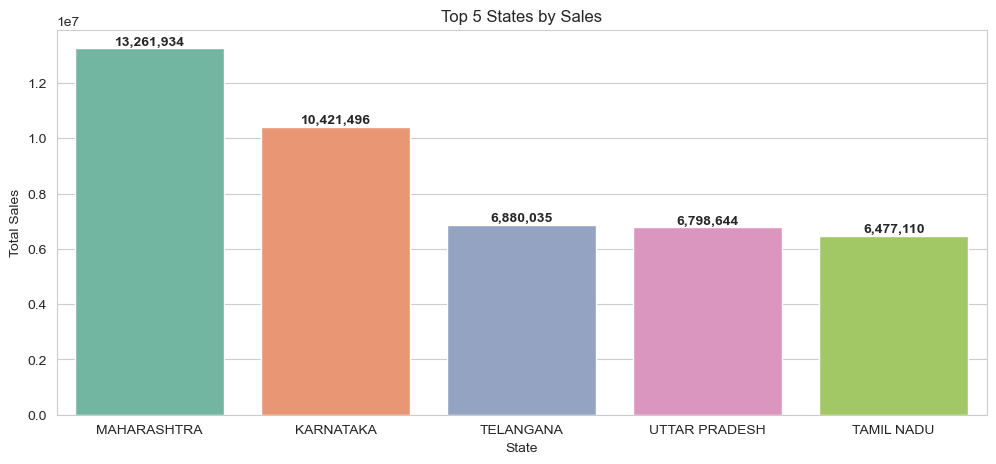

In [50]:
plt.figure(figsize = (12,5))
ax = sns.barplot(x = 'ship-state', y = 'Amount', data = top_5_states, hue=top_5_states.index, palette='Set2', legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Top 5 States by Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

## Top 10 Performing Cities

In [52]:
city_sales = amazon_sales.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
print(city_sales)

   ship-city      Amount
0  BENGALURU  8032281.47
1  HYDERABAD  5572456.97
2     MUMBAI  4261651.73
3  NEW DELHI  3935046.20
4    CHENNAI  3588706.13
5       PUNE  2785569.79
6    KOLKATA  1670410.99
7   GURUGRAM  1277179.78
8      THANE  1106022.54
9    LUCKNOW  1045514.10


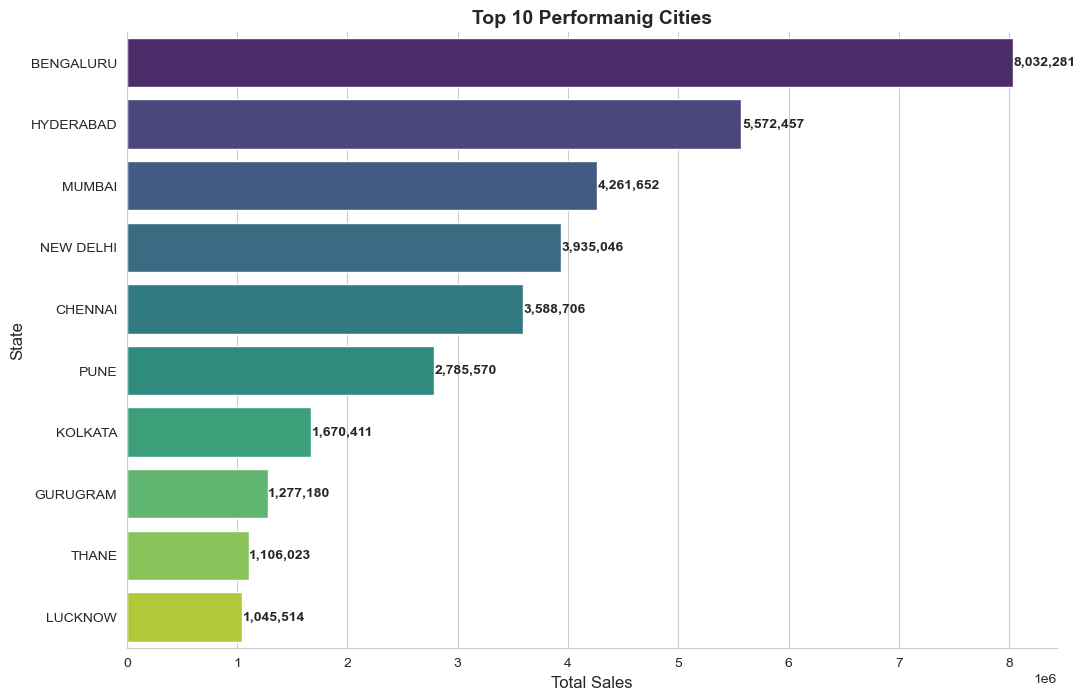

In [53]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='ship-city', x='Amount', data=city_sales, hue='ship-city', palette='viridis', legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width() + 5000, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold')

plt.title('Top 10 Performanig Cities', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)

sns.despine()
plt.show()

#### Insight:


1. Top 5 states: Maharashtra (₹13.2M), Karnataka (₹10.4M), Telangana, Uttar Pradesh, and Tamil Nadu.
2. Top 5 cities: Bengaluru, Hyderabad, Mumbai, New Delhi, and Chennai.
3. Regions like Lakshadweep, Mizoram, Ladakh, and Nagaland have significantly lower sales.

#### Actions:


1. Regional Ad Targeting: Focus digital ads and promotions on high-sales states/cities.
2. Warehouse Optimization: Maintain stock closer to high-demand areas to reduce shipping time/cost.
3. Localized Campaigns: Create offers based on local festivals (e.g., Diwali discounts).


#### Actionable Insights for Poor-Performing States

1. Targeted Marketing Campaigns – Use region-specific promotions, influencer marketing, and localized advertisements to increase brand awareness.
2. Logistics & Accessibility – Investigate if shipping costs or delivery times are discouraging buyers. Collaborate with third-party logisticsservices for improved delivery options.
3. Localized Pricing & Offers – Implement regional discounts, festive sales, or product bundles to attract customers in these areas.
4. Customer Trust & Awareness – Conduct surveys or feedback sessions to understand the challenges faced by customers in these states.
5. Expand Seller Network – Encourage local sellers to join the Amazon marketplace, making products more accessible and reducing shipping delays.

## Courier Performance Distribution


In [61]:
courier_status_count = amazon_sales.groupby('Courier Status')['Order ID'].nunique()
print(courier_status_count)

Courier Status
Cancelled       5659
On the Way      6386
Shipped       102102
Unshipped       6189
Name: Order ID, dtype: int64


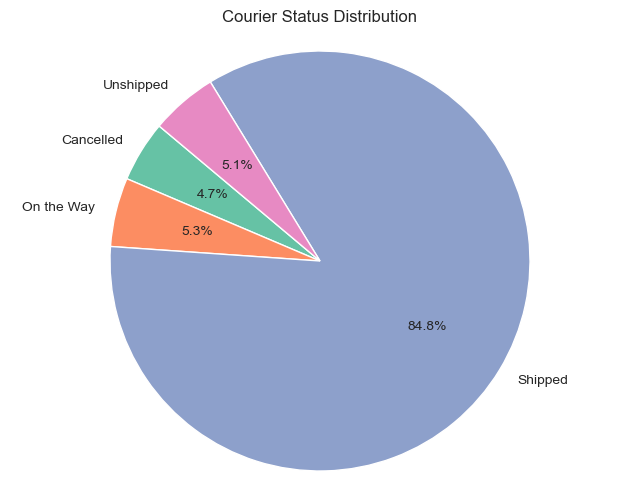

In [62]:
plt.figure(figsize=(8, 6))
plt.pie(courier_status_count, labels=courier_status_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

plt.title('Courier Status Distribution')
plt.axis('equal')
plt.show()

#### Insight:


1. 5,659 orders canceled, potentially affecting customer trust.
2. Most orders are "Shipped" but delays in "On the Way" and "Unshipped" exist.


#### Actions:


1. Track Courier Delays: Identify common delay reasons and optimize shipping partners.
2. Reduce cancellations (4.78%) by analyzing customer feedback and logistics inefficiencies.


## Product Shipping & Order Status

In [68]:
Product_shipping_status_count = amazon_sales.groupby('Status')['Order ID'].nunique().sort_values(ascending=False)
print(Product_shipping_status_count)

Status
Shipped                          72742
Shipped - Delivered to Buyer     26521
Cancelled                        17166
Shipped - Returned to Seller      1850
Shipped - Picked Up                918
Pending                            584
Pending - Waiting for Pick Up      262
Shipped - Returning to Seller      130
Shipped - Out for Delivery          32
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            4
Shipped - Damaged                    1
Name: Order ID, dtype: int64


In [69]:
Product_shipping_status_count = Product_shipping_status_count.reset_index()
Product_shipping_status_count.columns = ['status', 'order_count']

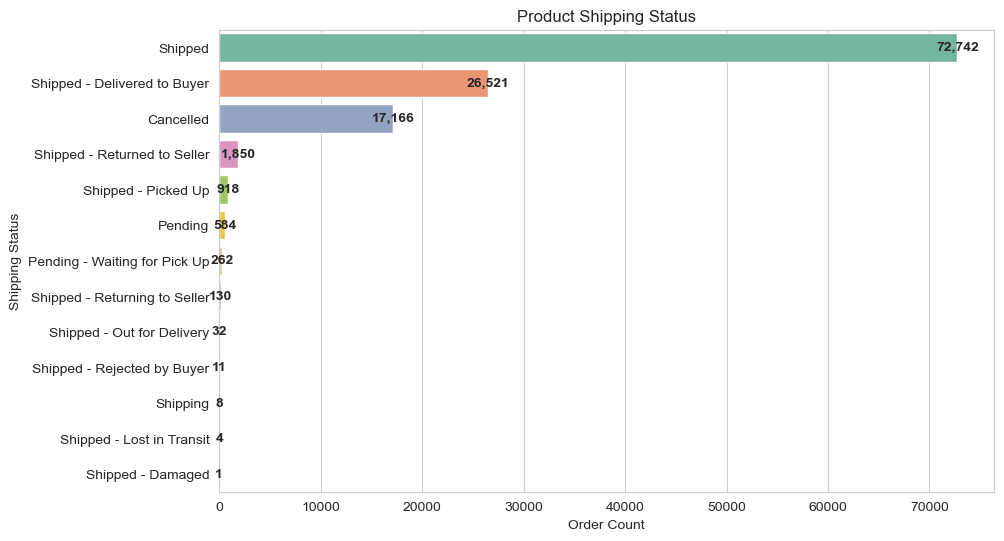

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='status', x='order_count', data=Product_shipping_status_count, palette='Set2', hue='status', dodge=False)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, fontweight='bold')

plt.title('Product Shipping Status')
plt.xlabel('Order Count')
plt.ylabel('Shipping Status')
plt.show()

#### Insight:


1. Most orders (72,742) are shipped, but 17,166 orders were canceled.
2. Low percentage of “Pending” orders, meaning quick processing but possible rejections.

#### Actions:


1. Improve Return Policy Clarity: If returns are frequent, check if policies confuse buyers.
2. Improve Order Confirmation Process: Reduce cancellations by verifying order details before dispatch.
3. Offer Faster Shipping Options: Consider premium shipping for high-demand regions.



## Product Shipping Fulfillment Analysis

In [76]:
fulfillment_count = amazon_sales.groupby('Fulfilment')['Order ID'].nunique().sort_values(ascending=False)
print(fulfillment_count)

Fulfilment
Amazon      83906
Merchant    36323
Name: Order ID, dtype: int64


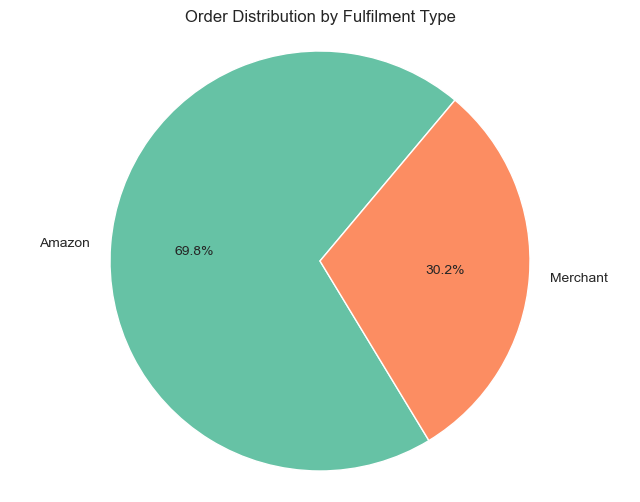

In [77]:
plt.figure(figsize=(8, 6))
plt.pie(fulfillment_count, labels=fulfillment_count.index, autopct='%1.1f%%', startangle=50, colors=sns.color_palette('Set2'))

plt.title('Order Distribution by Fulfilment Type')
plt.axis('equal') 
plt.show()

#### Insight:


1. Amazon handles 69.79% of fulfillment, while merchants manage 30.21%. This suggests Amazon's logistics dominance.

#### Actions:


Improve order fulfillment for merchants, possibly reducing Amazon's logistics burden.

## Customer Segmentation

### RFM Metrics

In [84]:
rfm = amazon_sales.groupby('Order ID').agg({
    'Date': lambda x: (amazon_sales['Date'].max() - x.max()).days,
    'Order ID': 'count', 
    'Amount': 'sum' 
}).rename(columns={'Date': 'Recency', 'Order ID': 'Frequency', 'Amount': 'Monetary'})

print(rfm.head())

                     Recency  Frequency  Monetary
Order ID                                         
171-0000547-8192359       22          1     301.0
171-0000902-4490745       20          1     544.0
171-0001409-6228339       22          1     422.0
171-0003082-5110755       56          1     563.0
171-0003738-2052324       87          1     379.0


### Segment Customers Based on RFM Scores

In [86]:
rfm['Customer_Segment'] = 'Low Value'
rfm.loc[(rfm['Recency'] < 30) & (rfm['Frequency'] > 2) & (rfm['Monetary'] > 5000), 'Customer_Segment'] = 'High Value'
rfm.loc[(rfm['Recency'] < 60) & (rfm['Frequency'] > 1), 'Customer_Segment'] = 'Potential Loyalist'

print(rfm['Customer_Segment'].value_counts())

Customer_Segment
Low Value             116267
Potential Loyalist      3962
Name: count, dtype: int64


#### RFM Segments Actions:

For Low-Value Customers (One-time or infrequent buyers)
1.  Personalized Offers – Provide discounts on their favorite categories to encourage repeat purchases.
2.  Retargeting Ads – Use digital marketing strategies like email or social media ads to remind them of abandoned carts or wishlist items.
3.  Loyalty Programs – Introduce reward points for purchases to incentivize returning customers.

🔹 For Potential Loyalists (Customers with good purchase value & frequency)
1. Exclusive Deals – Offer early access to sales, free shipping, or premium membership benefits.
2. Cross-Selling & Upselling – Recommend complementary products based on past purchases.
3. Engagement via Feedback – Send surveys asking for their experience and preferred product improvements.

## Summary & Recommendations

1. Optimize inventory for top-selling states (Maharashtra, Karnataka) and cities (Bengaluru, Hyderabad).
2. Plan promotional campaigns in weaker months to stabilize sales trends.
3. Improve order fulfillment for merchants, possibly reducing Amazon's logistics burden.
4. Reduce cancellations (4.78%) by analyzing customer feedback and logistics inefficiencies.
5. Expand product sizing options for popular sizes (M, L, XL) to meet demand efficiently.
6. Enhance courier reliability to minimize order delays and increase customer satisfaction.
7. Optimize inventory based on size demand & top-selling categories.
8. Boost underperforming categories with strategic discounts & bundles.



##                                          *** Thank You ***